## Red Wine Quality Analysis

Basic Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [2]:
a = pd.read_csv(
    "wine.csv")
a.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# checking null values
a.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
a.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [6]:
print(a.shape)
print(a.columns)

(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [7]:
a['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol', 'quality']

 Exploratory Data Ananlysis

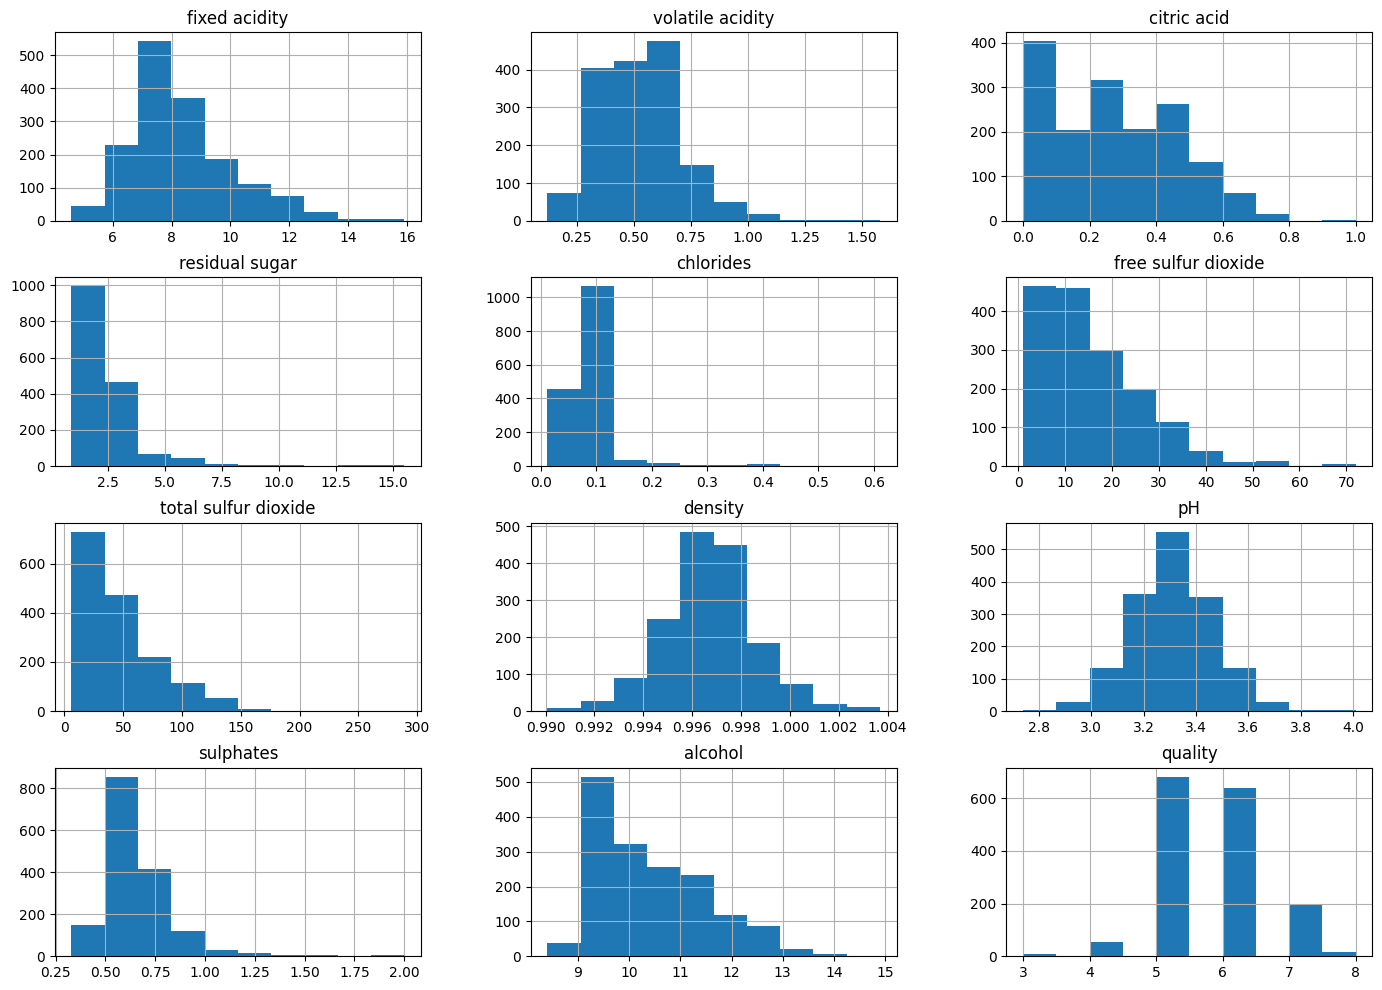

In [9]:
a.hist(figsize=(17, 12))
plt.show()

By looking at the above graph we can conclude that the red wine dataset’s distributions reveal the need for careful preprocessing, feature engineering, and model selection. Addressing class imbalance and skewed features is essential for accurate wine quality prediction, with tree-based machine learning models offering the best performance for this type of data

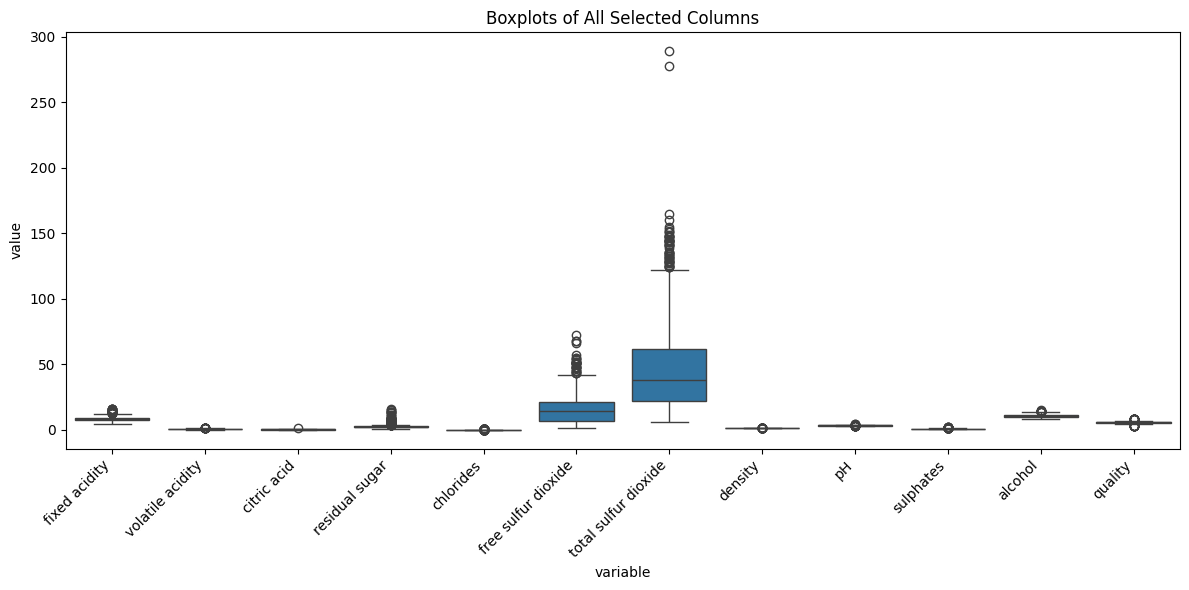

In [10]:
df_melted = pd.melt(a[cols])

plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.title('Boxplots of All Selected Columns')
plt.xticks(rotation=45, ha='right')  # Rotate labels and right-align
plt.tight_layout()
plt.show()

Bivariate Plots

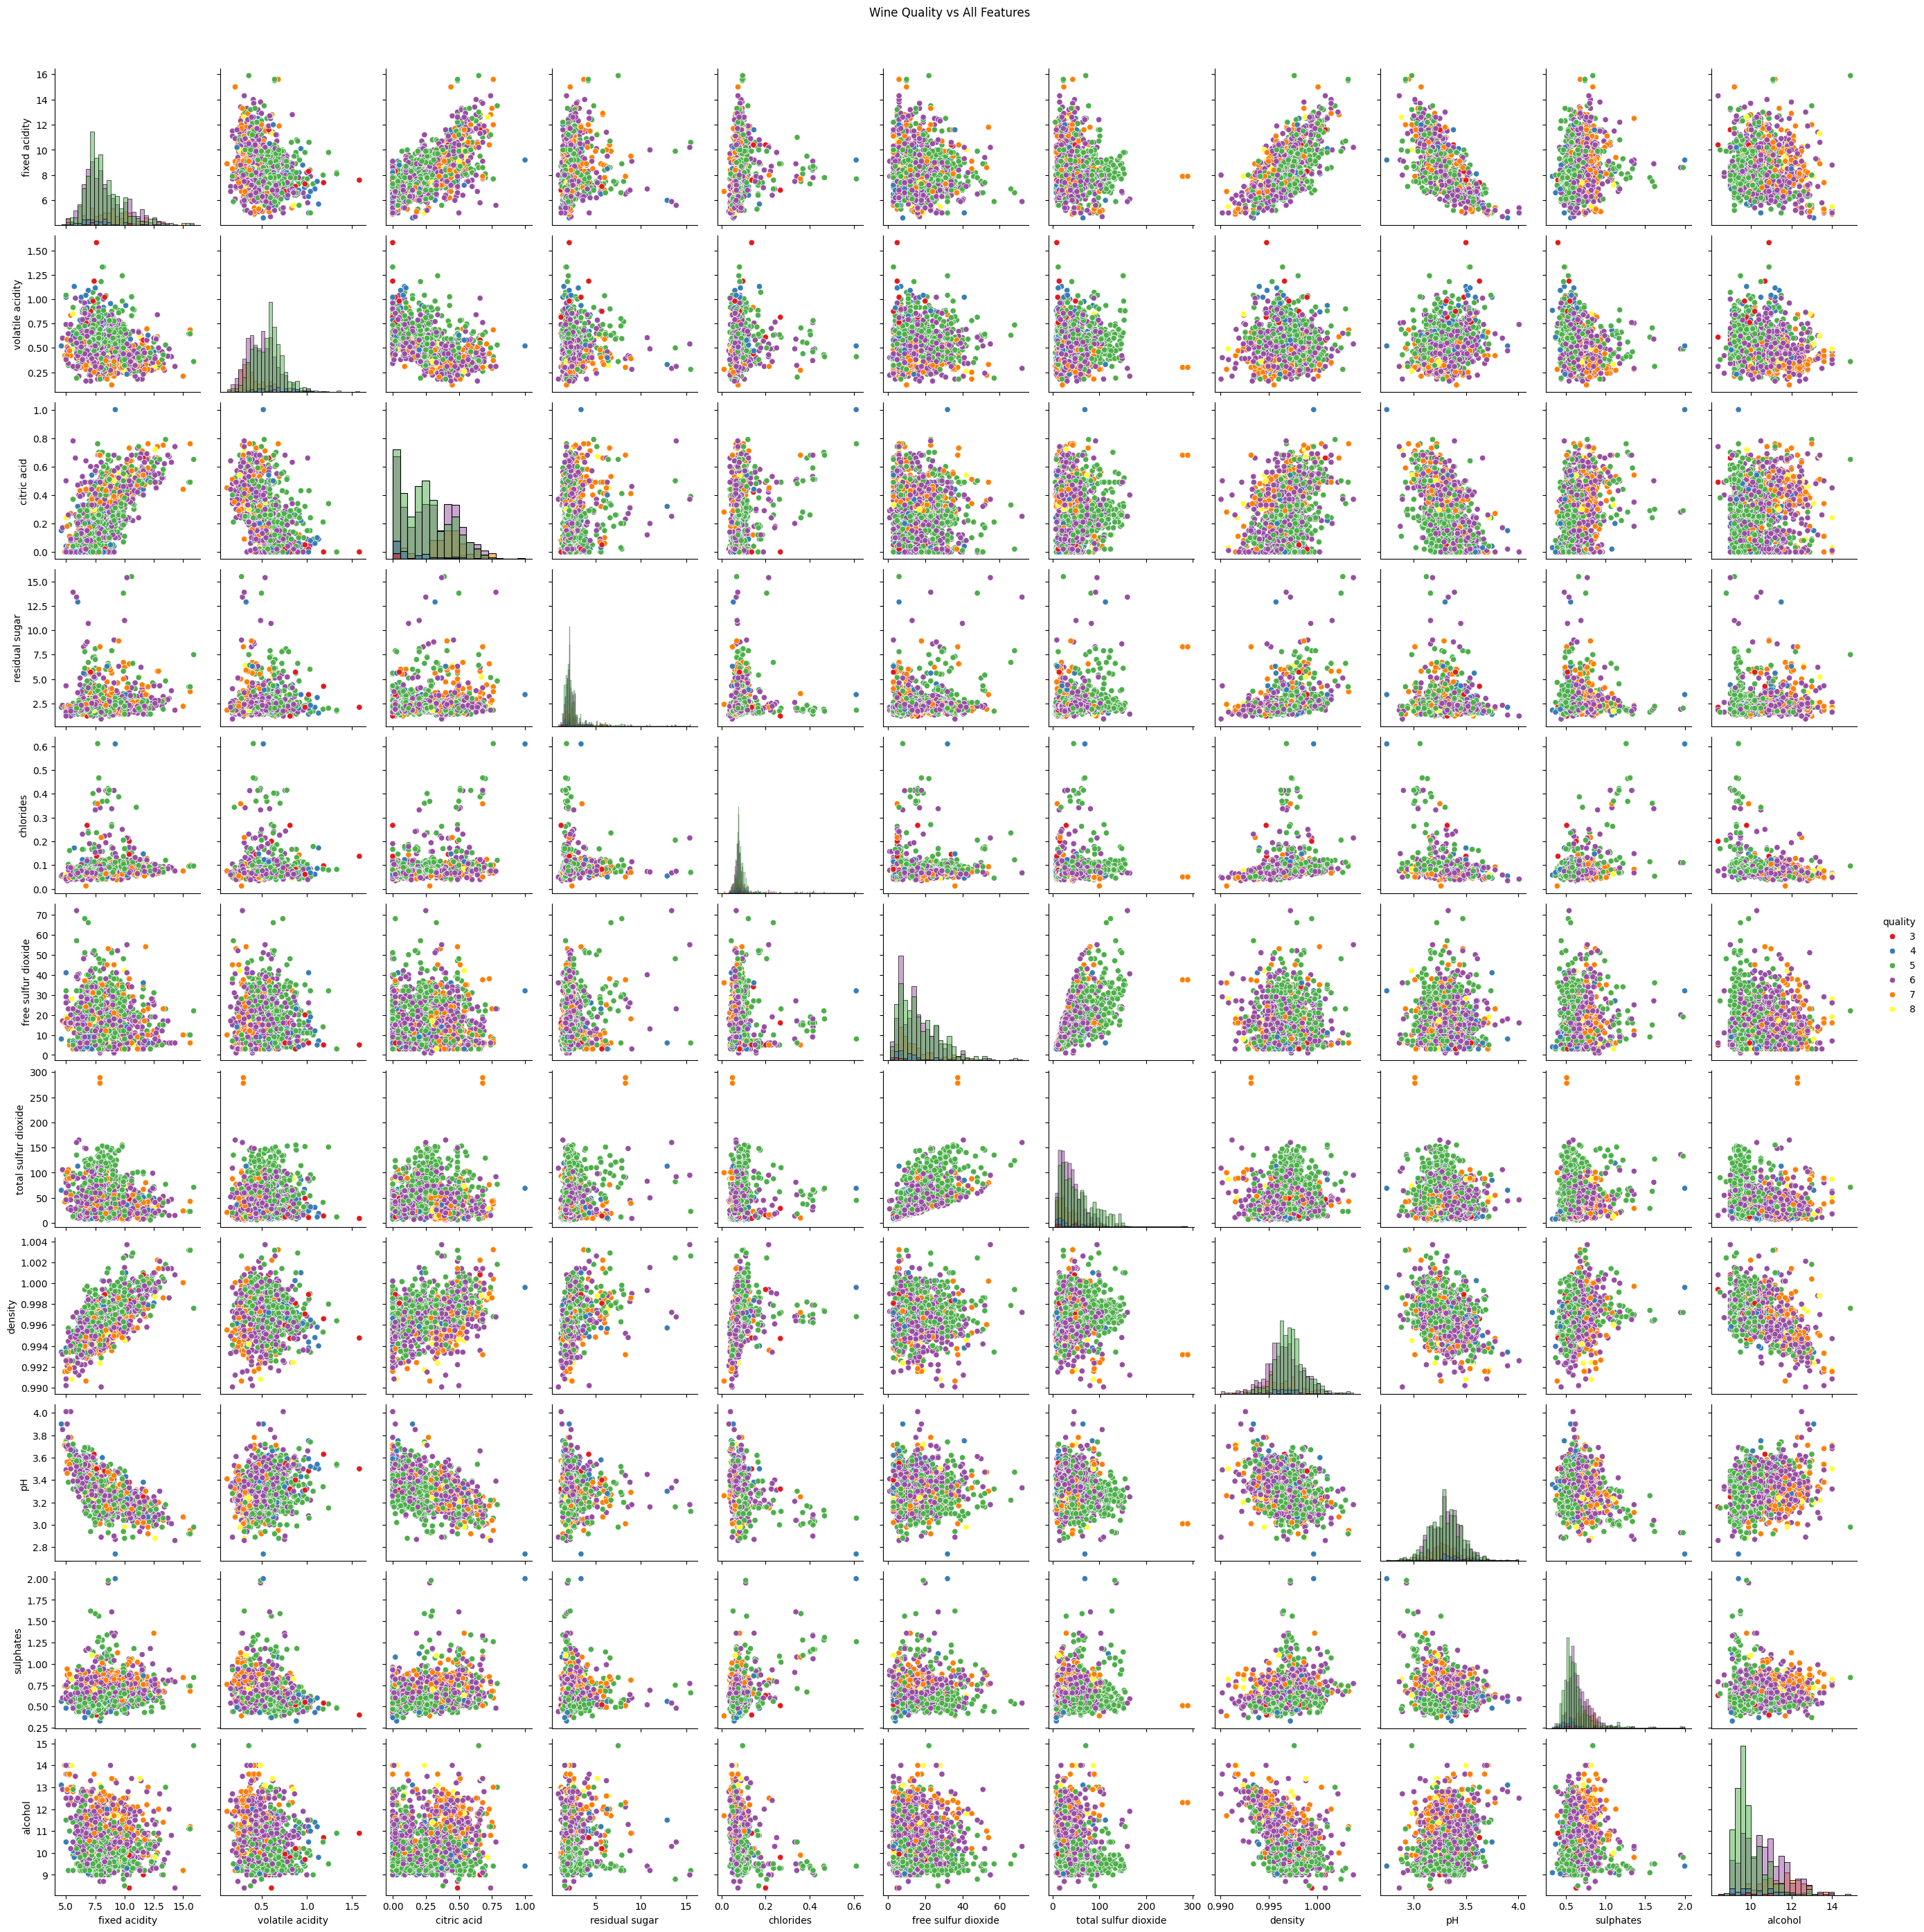

In [11]:
sns.pairplot(a, hue='quality', diag_kind='hist', palette='Set1')
plt.suptitle("Wine Quality vs All Features", y=1.02)
plt.show()

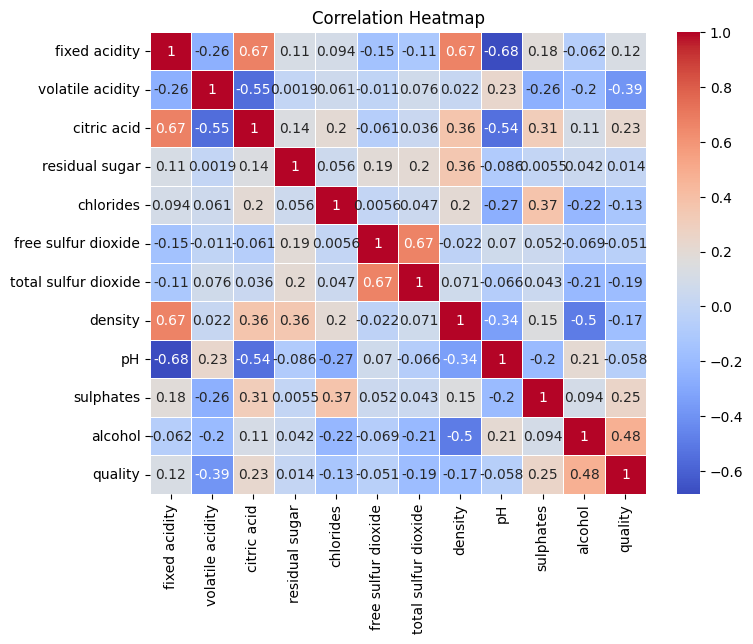

In [12]:
# Calculating the correlation matrix
corr = a.corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

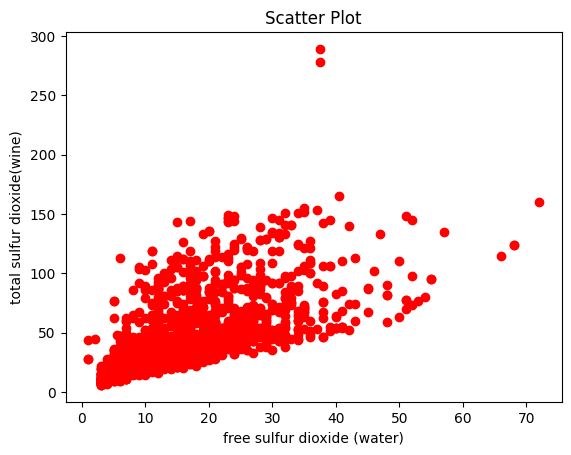

In [13]:
FSD = a["free sulfur dioxide"]
TSD = a["total sulfur dioxide"]

plt.scatter(FSD, TSD, color='red')
plt.title("Scatter Plot")
plt.xlabel("free sulfur dioxide (water)")
plt.ylabel("total sulfur dioxide(wine)")
plt.show()

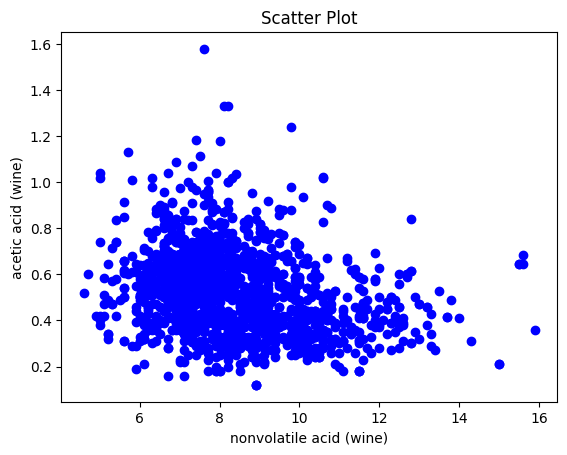

In [14]:
FA = a["fixed acidity"]
VA = a["volatile acidity"]

plt.scatter(FA, VA, color='blue')
plt.title("Scatter Plot")
plt.xlabel("nonvolatile acid (wine)")
plt.ylabel("acetic acid (wine)")
plt.show()

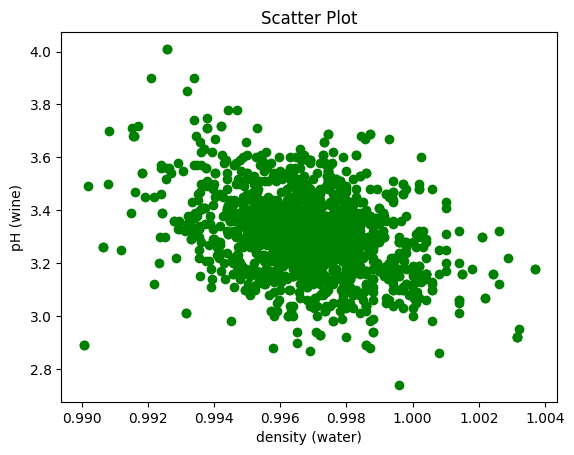

In [15]:
D = a["density"]
PH = a["pH"]

plt.scatter(D, PH, color='green')
plt.title("Scatter Plot")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

1. Primary Quality Drivers
Alcohol Content - Shows one of the clearest positive correlations with quality. 
Volatile Acidity - Displays a strong negative correlation with quality. Lower volatile acidity is associated with higher quality wines.
Sulphates - Shows a positive correlation with quality.
2. Secondary Quality Factors:
Citric Acid - Moderate positive correlation with quality. 
Fixed Acidity - Appears to have a moderate positive relationship with quality.
Density - Shows some correlation patterns that suggest it may be related to quality, though this is likely indirect 

In [16]:
#  Checking how many outliers are present in each numeric column
numerical_cols = a.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    Q1 = a[col].quantile(0.25)
    Q3 = a[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = a[(a[col] < lower) | (a[col] > upper)]

    print(f"{col}: {len(outliers)} outliers")

fixed acidity: 49 outliers
volatile acidity: 19 outliers
citric acid: 1 outliers
residual sugar: 155 outliers
chlorides: 112 outliers
free sulfur dioxide: 30 outliers
total sulfur dioxide: 55 outliers
density: 45 outliers
pH: 35 outliers
sulphates: 59 outliers
alcohol: 13 outliers
quality: 28 outliers


In [17]:
def cap_outliers(a, columns):
    a_capped = a.copy()
    for col in columns:
        Q1 = a_capped[col].quantile(0.25)
        Q3 = a_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        a_capped[col] = a_capped[col].clip(lower, upper)
    return a_capped


numerical_cols = a.select_dtypes(include=['int64', 'float64']).columns
a_capped = cap_outliers(a, numerical_cols)

In [18]:
def impute_outliers(a, columns):
    a_imputed = a.copy()
    for col in columns:
        Q1 = a_imputed[col].quantile(0.25)
        Q3 = a_imputed[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = a_imputed[col].median()
        a_imputed.loc[(a_imputed[col] < lower) | (
            a_imputed[col] > upper), col] = median
    return a_imputed


a_imputed = impute_outliers(a, numerical_cols)

In [19]:
# Checking how many outliers are present in each numeric column after imputing
numerica_imputedl_cols = a_imputed.select_dtypes(
    include=['int64', 'float64']).columns

for col in numerica_imputedl_cols:
    Q1 = a_imputed[col].quantile(0.25)
    Q3 = a_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = a_imputed[(a_imputed[col] < lower) | (a_imputed[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")

fixed acidity: 29 outliers
volatile acidity: 5 outliers
citric acid: 0 outliers
residual sugar: 55 outliers
chlorides: 76 outliers
free sulfur dioxide: 0 outliers
total sulfur dioxide: 25 outliers
density: 13 outliers
pH: 0 outliers
sulphates: 16 outliers
alcohol: 7 outliers
quality: 0 outliers


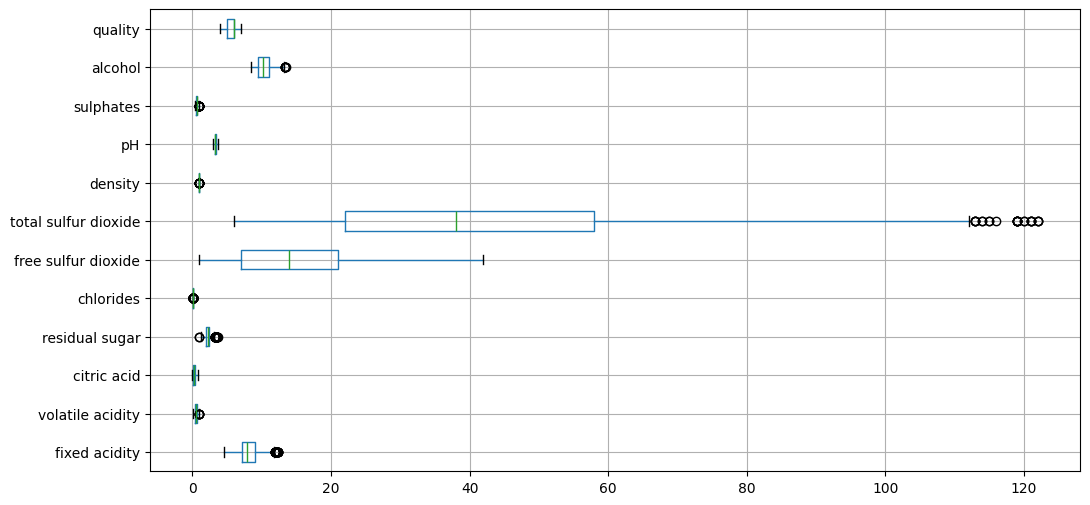

In [20]:
import matplotlib.pyplot as plt
a_imputed.boxplot(column=list(numerica_imputedl_cols),
                  figsize=(12, 6), vert=False)
plt.show()

Even after capping or transforming outliers, the IQR method may still flag some values as outliers.
This is because capping changes the data distribution, shifting the IQR boundaries,
and the IQR method will always flag a certain number of points as statistical outliers.
The following code checks for statistical outliers in each numeric column using the IQR rule,
but note that having some outliers is normal and does not necessarily indicate a problem with the data.


## Regression Approach

RandomForestRegressor

Mean Absolute Error (MAE): 0.407
Root Mean Squared Error (RMSE): 0.525
Accuracy Score: 49.701%


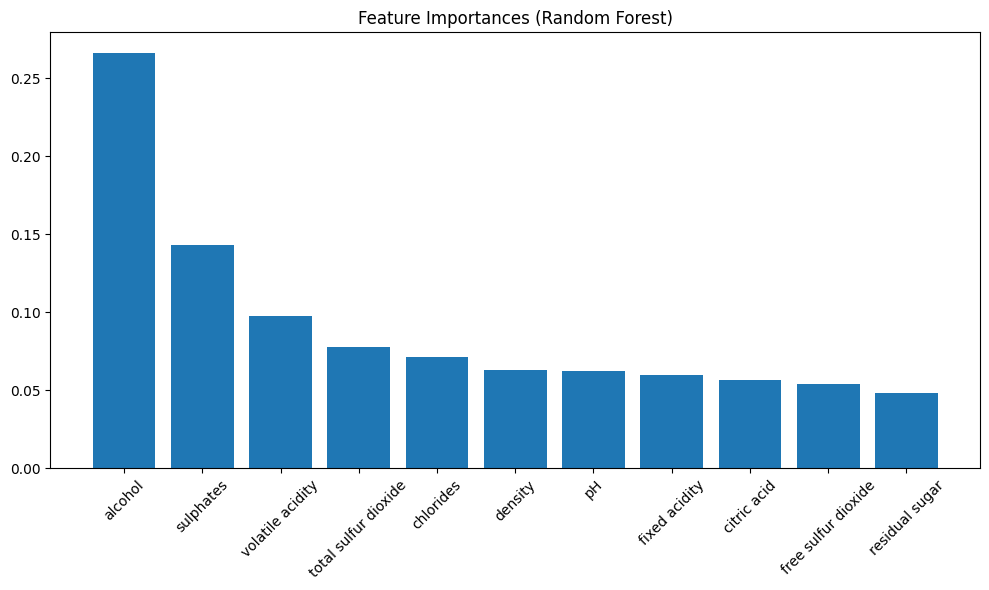

In [21]:
X = a_imputed.drop('quality', axis=1)
y = a_imputed['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"Accuracy Score: {r2*100:.3f}%")


importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

GradientBoostingRegressor

Gradient Boosting MAE: 0.446
Gradient Boosting RMSE: 0.560
Gradient Boosting Accuracy: 42.819%


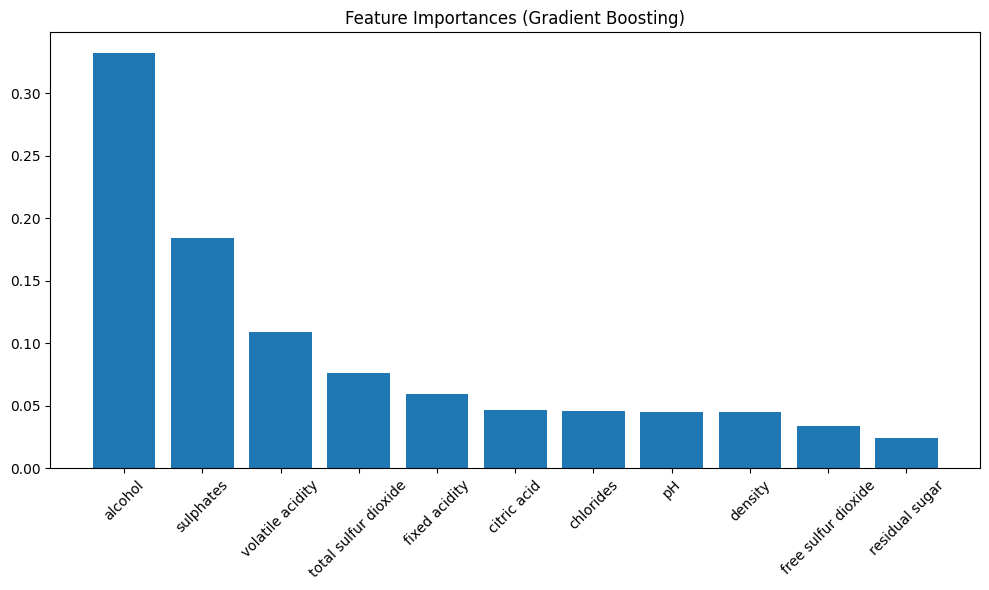

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = a_imputed.drop('quality', axis=1)
y = a_imputed['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

gbr = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting MAE: {mae:.3f}")
print(f"Gradient Boosting RMSE: {rmse:.3f}")
print(f"Gradient Boosting Accuracy: {r2*100:.3f}%")

importances = gbr.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

Regression Approach: The model predicts wine quality as a continuous score, achieving a Mean Absolute Error (MAE) of 0.407 and a Root Mean Squared Error (RMSE) of 0.525, indicating moderate precision in estimating the numeric quality rating

## Classification Approach

Logistic Regression

In [23]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Converting quality to binary label
a_imputed['quality_label'] = np.where(a_imputed['quality'] >= 7, 'Good', 'Bad')


X = a_imputed.drop(['quality', 'quality_label'], axis=1)
y = a_imputed['quality_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)


print("      Logistic Regression Results      ")
print(f"Accuracy       : {accuracy_score(y_test, y_pred_log)*100:.3f}%")
print(
    f"Precision      : {precision_score(y_test, y_pred_log, pos_label='Good'):.3f}")
print(
    f"Recall         : {recall_score(y_test, y_pred_log, pos_label='Good'):.3f}")
print(f"F1-Score       : {f1_score(y_test, y_pred_log, pos_label='Good'):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

      Logistic Regression Results      
Accuracy       : 86.875%
Precision      : 0.400
Recall         : 0.100
F1-Score       : 0.160
Confusion Matrix:
[[274   6]
 [ 36   4]]


Decision Tree

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

a_imputed['quality_label'] = np.where(a_imputed['quality'] >= 7, 'Good', 'Bad')

X = a_imputed.drop(['quality', 'quality_label'], axis=1)
y = a_imputed['quality_label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)


print("         Decision Tree Results         ")
print(f"Accuracy       : {accuracy_score(y_test, y_pred_dt)*100:.2f}%")
print(
    f"Precision      : {precision_score(y_test, y_pred_dt, pos_label='Good'):.3f}")
print(
    f"Recall         : {recall_score(y_test, y_pred_dt, pos_label='Good'):.3f}")
print(f"F1-Score       : {f1_score(y_test, y_pred_dt, pos_label='Good'):.3f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

         Decision Tree Results         
Accuracy       : 87.81%
Precision      : 0.514
Recall         : 0.475
F1-Score       : 0.494
Confusion Matrix:
[[262  18]
 [ 21  19]]


RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

a_imputed['quality_label'] = np.where(a_imputed['quality'] >= 7, 'Good', 'Bad')


X = a_imputed.drop(['quality', 'quality_label'], axis=1)


y = a_imputed['quality_label']


X_train, X_test, y_train, y_test = train_test_split(



    X, y, test_size=0.2, random_state=42, stratify=y
)


rf = RandomForestClassifier(n_estimators=100, random_state=42)


rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print("         Random Forest Results         ")


print(f"Accuracy       : {accuracy_score(y_test, y_pred_rf)*100:.2f}%")
print(



    f"Precision      : {precision_score(y_test, y_pred_rf, pos_label='Good'):.3f}")
print(



    f"Recall         : {recall_score(y_test, y_pred_rf, pos_label='Good'):.3f}")


print(f"F1-Score       : {f1_score(y_test, y_pred_rf, pos_label='Good'):.3f}")


print("Confusion Matrix:")


print(confusion_matrix(y_test, y_pred_rf))

         Random Forest Results         
Accuracy       : 90.62%
Precision      : 0.727
Recall         : 0.400
F1-Score       : 0.516
Confusion Matrix:
[[274   6]
 [ 24  16]]


Classification Approach: By classifying wines as "good" or "bad" based on a quality threshold, the Random Forest model reached an accuracy of 90.62%, with a precision of 0.727, recall of 0.400, and an F1-score of 0.516, reflecting strong overall accuracy but moderate balance between precision and recall

Features Which Most Impact Wine Quality

Top Features Impacting Wine Quality:
alcohol                 0.140281
sulphates               0.122812
volatile acidity        0.119264
density                 0.104401
citric acid             0.086927
fixed acidity           0.084899
total sulfur dioxide    0.076698
chlorides               0.074553
pH                      0.066803
free sulfur dioxide     0.063027
dtype: float64


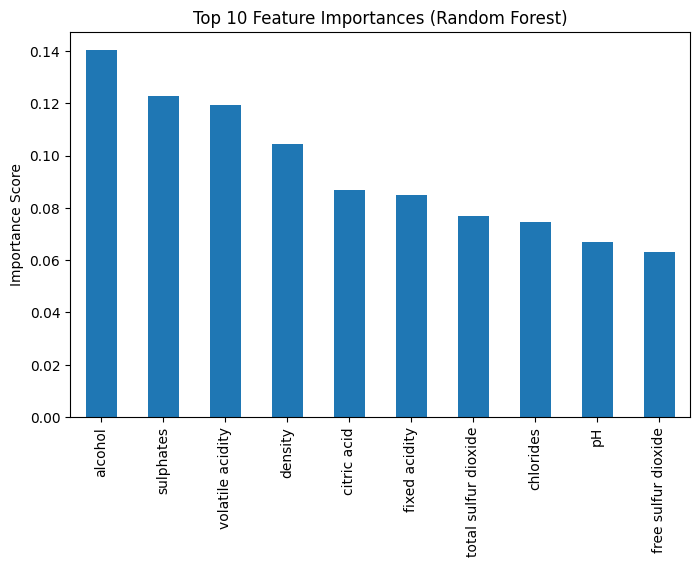

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(
    importances, index=feature_names).sort_values(ascending=False)

print("Top Features Impacting Wine Quality:")
print(feat_imp.head(10))

plt.figure(figsize=(8, 5))
feat_imp.head(10).plot(kind='bar')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.show()

From the feature analysis, we can observe that:-

Red Wine quality highly depends on:
1. Alcohol
2. Sulphates

Red Wine quality moderately depends on:
1. Volatile acidity
2. Total sulfur dioxide
3. Chlorides

Red Wine quality lowly depends on:
1. Density
2. pH
3. Fixed acidity
4. Citric acid
5. Free sulfur dioxide


Classification thresholds enable wineries to precisely define which wines qualify as "premium" by setting a minimum predicted quality score—such as labeling only wines with a model-predicted score of 7 or higher as premium. This approach ensures that only wines meeting the highest quality standards are included in the premium line, enhancing exclusivity and aligning offerings with customer expectations for top-tier product